### Endpoints that we should be interested in

cities: provides a simple listing of cities within the platforms  

countries: provides a simple listing of countries within the platform  

fetches: providing data about individual fetch operations that are used to populate data in the platform  

latest: provides the latest value of each available parameter for every location in the system  

locations: provides a list of measurement locations and their meta data  

measurements: provides data about individual measurements  

parameters: provides a simple listing of parameters within the platform  

sources: provides a list of data sources

In [1]:
import openaq
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
api = openaq.OpenAQ()

status, resp = api.cities()

In [2]:
from pandas.io.json import json_normalize

df = json_normalize(resp)

In [3]:
df = api.latest(df=True)

In [4]:
df.head()

,averagingPeriod.unit,averagingPeriod.value,city,country,location,parameter,sourceName,unit,value
lastUpdated,,,,,,,,,
2019-03-19 06:00:00,hours,1.0,天津市,CN,淮河道,so2,ChinaAQIData,b'\xc2\xb5g/m\xc2\xb3',19.0
2019-03-19 06:00:00,hours,1.0,天津市,CN,淮河道,no2,ChinaAQIData,b'\xc2\xb5g/m\xc2\xb3',23.0
2019-03-19 07:00:00,hours,1.0,天津市,CN,淮河道,o3,ChinaAQIData,b'\xc2\xb5g/m\xc2\xb3',191.0
2019-03-19 06:00:00,hours,1.0,天津市,CN,淮河道,pm25,ChinaAQIData,b'\xc2\xb5g/m\xc2\xb3',76.0
2019-03-19 06:00:00,hours,1.0,天津市,CN,淮河道,pm10,ChinaAQIData,b'\xc2\xb5g/m\xc2\xb3',110.0


In [5]:
resp = api.cities(df=True, limit = 10000)

In [6]:
resp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 4 columns):
city         2652 non-null object
count        2652 non-null int64
country      2652 non-null object
locations    2652 non-null int64
dtypes: int64(2), object(2)
memory usage: 83.0+ KB


In [7]:
resp.head(10)

,city,count,country,locations
0,Escaldes-Engordany,62835,AD,2
1,unused,3238,AD,1
2,Dubai,11425,AE,1
3,Abu Dhabi,18437,AE,1
4,Buenos Aires,14976,AR,4
5,Amt der K�rntner Landesregierung,104663,AT,16
6,Amt der Steierm�rkischen Landesregierung,320372,AT,41
7,"Gemeinde Wien, MA22 Umweltschutz",130328,AT,21
8,Umweltinstitut des Landes Vorarlberg,36108,AT,9
9,Amt der Ober�sterreichischen Landesregierung,154329,AT,16


In [8]:
print(resp.query("country == 'IN'"))

                    city    count country  locations
1239           Bengaluru   671639      IN         18
1240           Moradabad    74202      IN          2
1241         Bulandshahr    30667      IN          1
1242      Chikkaballapur    28168      IN          1
1243               Delhi  1977213      IN         79
1244         Navi Mumbai    34936      IN          2
1245           Ghaziabad   156259      IN          4
1246                Gaya   117220      IN          2
1247                Jind      822      IN          1
1248          Vijayawada    40553      IN          3
1249           Hyderabad   770256      IN         16
1250    Mandi Gobindgarh    90232      IN          1
1251            Gurugram    37480      IN          4
1252       Visakhapatnam   254596      IN          9
1253  Thiruvananthapuram    98950      IN          3
1254             Narnaul      867      IN          1
1255             Bhiwadi    56892      IN          3
1256            Siliguri    20378      IN     

In [9]:
res = api.countries(limit=10000, df= True)

In [10]:
res.head()

,cities,code,count,locations,name
0,2,AD,66073,3,Andorra
1,1,AR,14976,4,Argentina
2,21,AU,5429568,105,Australia
3,16,AT,1521351,306,Austria
4,1,BH,32037,1,Bahrain


In [11]:
res = api.parameters(df = True)

In [12]:
res.head()

,description,id,name,preferredUnit
0,Black Carbon,bc,BC,µg/m³
1,Carbon Monoxide,co,CO,ppm
2,Nitrogen Dioxide,no2,NO2,ppm
3,Ozone,o3,O3,ppm
4,Particulate matter less than 10 micrometers in...,pm10,PM10,µg/m³


In [13]:
loc = api.locations(df = True)

In [14]:
loc.head()

,city,coordinates.latitude,coordinates.longitude,count,country,firstUpdated,lastUpdated,location,parameters,sourceName,sourceNames
0,天津市,39.213300,117.18370,15437,CN,2018-10-17 12:00:00,2019-03-19 07:00:00,淮河道,"[so2, co, pm25, o3, no2, pm10]",ChinaAQIData,[ChinaAQIData]
1,Stockholm,NaN,NaN,241,SE,2018-03-27 22:00:00,2018-04-04 15:00:00,(Folkungagatan tillfälligt avstängd),"[pm10, no2]",Sweden,[Sweden]
2,Ulaanbaatar,47.917980,106.84806,5987,MN,2019-03-01 06:45:00,2019-03-13 21:45:00,1-r khoroolol,"[pm25, no2, pm10, co, so2]",Agaar.mn,[Agaar.mn]
3,Ulaanbaatar,47.932907,106.92139,372614,MN,2015-09-01 00:00:00,2019-03-13 22:00:00,100 ail,"[pm10, co, o3, no2, so2]",Agaar.mn,[Agaar.mn]
4,Omaha-Council Bluffs,41.322470,-95.93799,28136,US,2016-03-06 19:00:00,2019-04-25 22:00:00,16th and Whitmore,"[o3, so2]",AirNow,[AirNow]


In [15]:
loc.iloc[0]

city                                                天津市
coordinates.latitude                            39.2133
coordinates.longitude                           117.184
count                                             15437
country                                              CN
firstUpdated                        2018-10-17 12:00:00
lastUpdated                         2019-03-19 07:00:00
location                                            淮河道
parameters               [so2, co, pm25, o3, no2, pm10]
sourceName                                 ChinaAQIData
sourceNames                              [ChinaAQIData]
Name: 0, dtype: object

In [16]:
delhi_loc = api.locations(city = 'Delhi', df = True)

In [17]:
delhi_loc.head()

,city,coordinates.latitude,coordinates.longitude,count,country,firstUpdated,lastUpdated,location,parameters,sourceName,sourceNames
0,Delhi,28.815329,77.15301,4940,IN,2018-12-14 01:30:00,2019-02-14 04:45:00,"Alipur, Delhi - DPCC","[o3, pm25, no2, pm10, so2, co]",caaqm,[caaqm]
1,Delhi,28.650800,77.31520,102326,IN,2015-06-29 14:30:00,2017-11-28 10:15:00,Anand Vihar,"[pm10, o3, no2, so2, pm25, co]",CPCB,"[Anand Vihar, CPCB]"
2,Delhi,28.650800,77.31520,33714,IN,2017-11-27 18:35:00,2019-02-14 05:00:00,"Anand Vihar, Delhi - DPCC","[no2, o3, pm10, so2, pm25, co]",caaqm,"[CPCB, caaqm, data.gov.in]"
3,Delhi,28.652740,77.29779,172,IN,2018-03-09 03:30:00,2018-03-16 23:30:00,"Anand Vihar, New Delhi - DPCC","[o3, pm25, pm10, so2, no2, co]",data.gov.in,[data.gov.in]
4,Delhi,28.695381,77.18166,5511,IN,2018-03-20 03:30:00,2019-02-14 04:45:00,"Ashok Vihar, Delhi - DPCC","[no2, so2, o3, pm25, pm10, co]",caaqm,"[caaqm, data.gov.in]"


In [18]:
delhi_pm25 = api.locations(city = 'Delhi', parameter = 'pm25', df = True)
delhi_pm25.head()

,city,coordinates.latitude,coordinates.longitude,count,country,firstUpdated,lastUpdated,location,parameters,sourceName,sourceNames
0,Delhi,28.815329,77.15301,859,IN,2018-12-14 01:30:00,2019-02-14 04:45:00,"Alipur, Delhi - DPCC",[pm25],caaqm,[caaqm]
1,Delhi,28.650800,77.31520,23891,IN,2015-06-29 14:30:00,2017-11-28 10:15:00,Anand Vihar,[pm25],CPCB,"[Anand Vihar, CPCB]"
2,Delhi,28.646835,77.31603,6200,IN,2017-11-27 18:35:00,2019-02-14 05:00:00,"Anand Vihar, Delhi - DPCC",[pm25],caaqm,"[caaqm, CPCB, data.gov.in]"
3,Delhi,28.652740,77.29779,28,IN,2018-03-09 03:30:00,2018-03-16 23:30:00,"Anand Vihar, New Delhi - DPCC",[pm25],data.gov.in,[data.gov.in]
4,Delhi,28.695381,77.18166,966,IN,2018-03-20 03:30:00,2019-02-14 04:45:00,"Ashok Vihar, Delhi - DPCC",[pm25],caaqm,"[caaqm, data.gov.in]"


In [19]:
latest_del = api.latest(city='Delhi', parameter = 'pm25', df= True)
latest_del.head()

,averagingPeriod.unit,averagingPeriod.value,city,country,location,parameter,sourceName,unit,value
lastUpdated,,,,,,,,,
2019-02-14 04:45:00,hours,0.25,Delhi,IN,"Alipur, Delhi - DPCC",pm25,caaqm,b'\xc2\xb5g/m\xc2\xb3',194.0
2017-11-28 10:15:00,hours,0.25,Delhi,IN,Anand Vihar,pm25,CPCB,b'\xc2\xb5g/m\xc2\xb3',70.0
2019-02-14 05:00:00,hours,0.25,Delhi,IN,"Anand Vihar, Delhi - DPCC",pm25,caaqm,b'\xc2\xb5g/m\xc2\xb3',205.0
2018-03-16 23:30:00,hours,1.00,Delhi,IN,"Anand Vihar, New Delhi - DPCC",pm25,data.gov.in,b'\xc2\xb5g/m\xc2\xb3',166.0
2019-02-14 04:45:00,hours,0.25,Delhi,IN,"Ashok Vihar, Delhi - DPCC",pm25,caaqm,b'\xc2\xb5g/m\xc2\xb3',182.0


## And to extract all the data, use measurements

In [20]:
all_data = api.measurements(city = 'Delhi', parameter = 'pm25', limit= '10000', df= True)
all_data.groupby(['location'])['value'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
"Alipur, Delhi - DPCC",147.0,194.809524,39.556156,114.00,166.0000,196.000,224.0000,267.00
"Anand Vihar, Delhi - DPCC",152.0,219.407895,49.899018,119.00,182.0000,220.000,246.0000,385.00
"Ashok Vihar, Delhi - DPCC",150.0,214.900000,50.120894,101.00,186.0000,203.500,254.5000,323.00
"Aya Nagar, Delhi - IMD",88.0,114.798750,64.564209,0.00,84.9100,114.565,156.6125,259.10
"Bawana, Delhi - DPCC",150.0,244.346667,67.206782,151.00,195.2500,223.000,288.0000,425.00
"Burari Crossing, Delhi - IMD",99.0,163.605657,45.294948,71.72,123.4700,169.380,199.2750,264.84
"CRRI Mathura Road, Delhi - IMD",113.0,155.749823,37.618655,91.28,124.9300,158.230,185.6800,260.24
"DTU, Delhi - CPCB",143.0,201.291329,44.695646,127.80,164.8000,203.100,230.9700,343.50
"Dr. Karni Singh Shooting Range, Delhi - DPCC",110.0,169.500000,47.192316,86.00,139.0000,159.500,204.2500,276.00


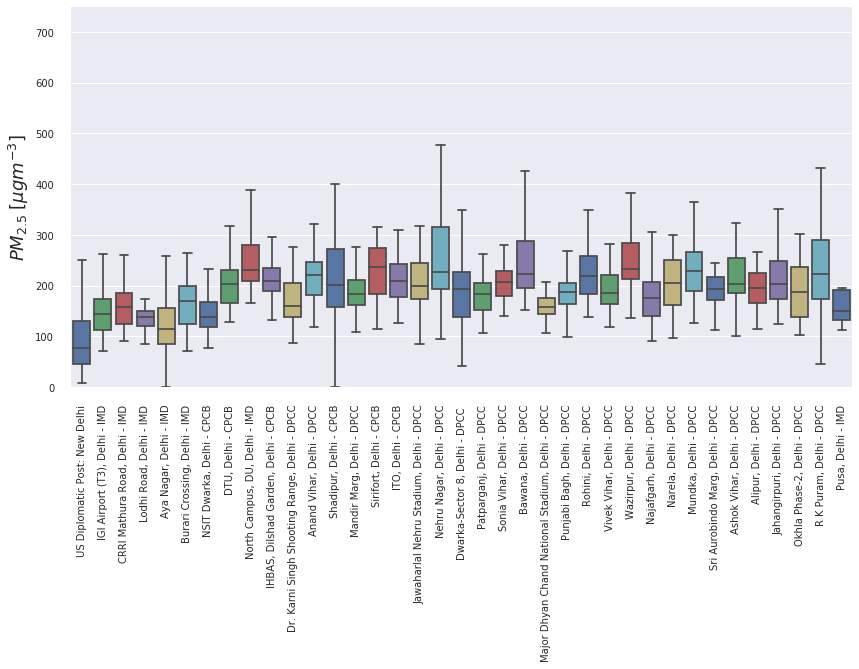

In [21]:
fig, ax = plt.subplots(1, figsize=(14,7))

for group, df in all_data.groupby('location'):
    _df = df.query("value >= 0.0").resample('1h').mean()
#     _df.value.plot(ax=ax, label=group)

ax = sns.boxplot(
    x='location',
    y='value',
    data=all_data.query("value >= 0.0"),
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 750])
ax.set_ylabel("$PM_{2.5}\;[\mu gm^{-3}]$", fontsize=18)
ax.set_xlabel("")

sns.despine(offset=10)

plt.xticks(rotation=90)
plt.show()

In [22]:
r = api.measurements(city = 'Delhi', location = 'Anand Vihar, Delhi - DPCC', limit = 1000, df = True)
r.parameter.unique()

array(['pm25', 'co', 'o3', 'so2', 'no2'], dtype=object)

In [24]:
res = api.measurements(city='Hilo', parameter='so2', limit=10000, df=True)

# Print out the statistics on a per-location basiss
res.groupby(['location'])['value'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Hawaii Volcanoes NP,2076.0,0.000851,0.003783,0.0,0.000,0.000,0.000,0.054
Hilo,1942.0,0.001106,0.000668,0.0,0.001,0.001,0.001,0.008
Kona,2024.0,0.000874,0.000333,0.0,0.001,0.001,0.001,0.002
Ocean View,1958.0,0.000030,0.000183,0.0,0.000,0.000,0.000,0.002
Pahala,2000.0,0.001126,0.000749,0.0,0.001,0.001,0.001,0.010


In [135]:
information = api.measurements(df=True)
information.head(100)

,city,coordinates.latitude,coordinates.longitude,country,date.utc,location,parameter,unit,value
date.local,,,,,,,,,
2019-04-26 03:00:00,Syddanmark,55.396387,10.389196,DK,2019-04-26 01:00:00,DK0046A,no2,b'\xc2\xb5g/m\xc2\xb3',0.0000
2019-04-26 04:00:00,Klaipeda,55.690000,21.179460,LT,2019-04-26 01:00:00,LT00033,pm10,b'\xc2\xb5g/m\xc2\xb3',0.0000
2019-04-26 03:00:00,Midtjylland,56.159783,10.193633,DK,2019-04-26 01:00:00,DK0056A,no2,b'\xc2\xb5g/m\xc2\xb3',0.0000
2019-04-26 03:00:00,Hovedstaden,55.631983,12.463316,DK,2019-04-26 01:00:00,DK0057A,no2,b'\xc2\xb5g/m\xc2\xb3',0.0000
2019-04-26 04:00:00,Kaunas,54.895128,23.986222,LT,2019-04-26 01:00:00,LT00041,co,b'\xc2\xb5g/m\xc2\xb3',0.0000
2019-04-26 03:00:00,Sjælland,55.694105,12.088629,DK,2019-04-26 01:00:00,DK0012R,no2,b'\xc2\xb5g/m\xc2\xb3',0.0000
2019-04-26 04:00:00,Klaipeda,55.690000,21.179460,LT,2019-04-26 01:00:00,LT00033,pm25,b'\xc2\xb5g/m\xc2\xb3',0.0000
2019-04-26 04:00:00,Kaunas,54.895128,23.986222,LT,2019-04-26 01:00:00,LT00041,pm25,b'\xc2\xb5g/m\xc2\xb3',0.0000
2019-04-26 03:00:00,Midtjylland,56.150558,10.200842,DK,2019-04-26 01:00:00,DK0051A,no2,b'\xc2\xb5g/m\xc2\xb3',0.0000


In [121]:
def get_lat_long(Input_City):
    data = api.locations(df=True,parameters='pm25',city=Input_City)
    data.drop_duplicates(subset=['city'],keep=False,inplace=False)
    return [data.iloc[0,1],data.iloc[0,2]]

In [122]:
locat = get_lat_long('Flanders')
locat

[51.281013, 4.329848]

In [168]:
def clean_data(data):
    data.sort_index
    data.dropna()
    #delete -999 values as NaN
    #FOR THOMAS
    return data

In [169]:
info_clean = clean_data(information[information['parameter']=='pm25'])
info_clean.head(100)

,city,coordinates.latitude,coordinates.longitude,country,date.utc,location,parameter,unit,value
date.local,,,,,,,,,
2019-04-26 04:00:00,Klaipeda,55.690000,21.179460,LT,2019-04-26 01:00:00,LT00033,pm25,b'\xc2\xb5g/m\xc2\xb3',0.00
2019-04-26 04:00:00,Kaunas,54.895128,23.986222,LT,2019-04-26 01:00:00,LT00041,pm25,b'\xc2\xb5g/m\xc2\xb3',0.00
2019-04-25 22:00:00,Tocopilla,-22.085519,-70.188683,CL,2019-04-26 01:00:00,Escuela E-10,pm25,b'\xc2\xb5g/m\xc2\xb3',9.24
2019-04-25 22:00:00,Talcahuano,-36.735998,-73.118693,CL,2019-04-26 01:00:00,Nueva Libertad,pm25,b'\xc2\xb5g/m\xc2\xb3',23.20
2019-04-25 21:00:00,Curacao,12.169600,-68.990000,CW,2019-04-26 01:00:00,US Diplomatic Post: Curacao,pm25,b'\xc2\xb5g/m\xc2\xb3',-999.00
2019-04-26 06:00:00,Kolkata,22.562630,88.363040,IN,2019-04-26 00:30:00,US Diplomatic Post: Kolkata,pm25,b'\xc2\xb5g/m\xc2\xb3',-999.00
2019-04-26 06:00:00,Hyderabad,17.384050,78.456360,IN,2019-04-26 00:30:00,US Diplomatic Post: Hyderabad,pm25,b'\xc2\xb5g/m\xc2\xb3',-999.00
2019-04-26 06:00:00,Chennai,13.087840,80.278470,IN,2019-04-26 00:30:00,US Diplomatic Post: Chennai,pm25,b'\xc2\xb5g/m\xc2\xb3',-999.00
2019-04-26 06:00:00,Mumbai,19.072830,72.882610,IN,2019-04-26 00:30:00,US Diplomatic Post: Mumbai,pm25,b'\xc2\xb5g/m\xc2\xb3',-999.00


In [ ]:
def create_graph():
    return

def get_future():
    #
    return

def get_current():
    #Get Current PM25
    return